In [ ]:
import os
import numpy as np
import tensorflow as tf
import pandas as pd
import nltk
import re
from random import randint
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
import matplotlib.pyplot as plt
%matplotlib inline
# nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import one_hot

In [ ]:
# creating instance of labelencoder
labelencoder = LabelEncoder()# Assigning numerical values and storing in another column


df_train = pd.read_csv('train_data.txt', sep=':::', header=None)
df_train.reset_index()

df_train.columns = ['old_index', 'film', 'genre', 'rewiev']
df_train.drop(['old_index'], axis=1, inplace=True)

y = df_train.genre
X = y.values.reshape(-1, 1)

ohe = OneHotEncoder()
X = ohe.fit_transform(X).toarray()
# df_train['target'] = OneHotEncoder().fit_transform(df_train['genre'].values.reshape(-1, 1)).toarray()
df_train.head()

/home/vad/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,film,genre,rewiev
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
df_test = pd.read_csv('test_data.txt', sep=':::', header=None, index_col=0)
df_test.columns = ['film', 'rewiev']
df_test.head()

/home/vad/anaconda3/envs/tf/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,film,rewiev
0,,
1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
5,Er nu zhai (1955),Before he was known internationally as a mart...


In [ ]:
print("Количество жанров для классификации: ",len(df_train.genre.unique()))

Количество жанров для классификации:  27


In [ ]:
print("Жанры фильмов:", df_train.genre.unique())

Жанры фильмов: [' drama ' ' thriller ' ' adult ' ' documentary ' ' comedy ' ' crime '
 ' reality-tv ' ' horror ' ' sport ' ' animation ' ' action ' ' fantasy '
 ' short ' ' sci-fi ' ' music ' ' adventure ' ' talk-show ' ' western '
 ' family ' ' mystery ' ' history ' ' news ' ' biography ' ' romance '
 ' game-show ' ' musical ' ' war ']


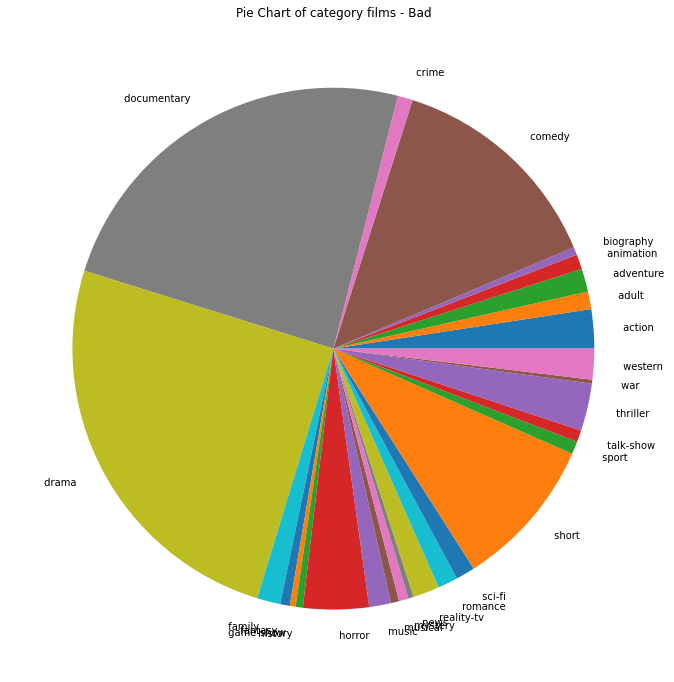

In [ ]:
df_pipe = df_train.groupby('genre').size()

# Make the plot with pandas
df_pipe.plot(kind='pie', subplots=True, figsize=(12, 12))
plt.title("Pie Chart of category films - Bad")
plt.ylabel("")
plt.show()

In [ ]:
from sklearn.feature_extraction import text
my_stop_words = text.ENGLISH_STOP_WORDS

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
clear_years = lambda x: x[:-7]
def try_regex(text):
    text = re.sub(r"[^a-zA-Z1-9]+", " ", text)
    return text


def tokenize(text):
    text = [lemmatizer.lemmatize(i.lower()) for i in nltk.word_tokenize(text.replace('-', ' ')) if i not in string.punctuation]
    filter_text = [i for i in text if ( i not in my_stop_words )]
    return filter_text

def clear_data(dataset):
    dataset = dataset.film.apply(clear_years)
    dataset['tokenized'] = dataset.rewiev.apply(tokenize)
    return dataset

In [ ]:
df_train['tokenized'] = df_train.rewiev.apply(try_regex)
df_test['tokenized'] = df_test.rewiev.apply(try_regex)
df_train.head()

,film,genre,rewiev,tokenized
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,The film s title refers not only to the un re...


In [ ]:
df_train['tokenized'] = df_train.tokenized.apply(tokenize)
df_test['tokenized'] = df_test.tokenized.apply(tokenize)
df_train.head()

,film,genre,rewiev,tokenized
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,"[listening, conversation, doctor, parent, 1, y..."
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,"[brother, sister, past, incestuous, relationsh..."
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,"[bus, student, field, trip, museum, natural, h..."
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,"[help, unemployed, father, make, end, meet, ed..."
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,"[film, s, title, refers, recovered, body, grou..."


In [ ]:
def unqiue_symbols(data_frame_column):
    """
    Просто смотрим, вдруг есть какие-то левые символы
    """
    uniq_sumb = set()
    for text in df_train.tokenized:
        for word in text:
            for symbol in word:
                uniq_sumb.add(symbol)
                
    return uniq_sumb

unq = unqiue_symbols(df_train.tokenized)

print(unq)
print(len(unq))

{'9', '1', 'd', '5', 'o', 'j', 'y', 'z', 'b', 'w', 'g', '7', 'v', 'h', 'l', '8', '2', 'a', 'x', 'u', '6', '3', 'm', 'p', 'e', 'q', 'f', 'n', 'i', 'k', 'c', '4', 't', 's', 'r'}
35


In [ ]:
model_vect  = Word2Vec(df_train.tokenized, vector_size=256, window=10, min_count=10, workers=4 ,sg=1)

2021-08-06 20:36:01,063 : INFO : collecting all words and their counts
2021-08-06 20:36:01,064 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2021-08-06 20:36:01,138 : INFO : PROGRESS: at sentence #10000, processed 558263 words, keeping 43908 word types
2021-08-06 20:36:01,233 : INFO : PROGRESS: at sentence #20000, processed 1114389 words, keeping 63145 word types
2021-08-06 20:36:01,308 : INFO : PROGRESS: at sentence #30000, processed 1663168 words, keeping 78384 word types
2021-08-06 20:36:01,383 : INFO : PROGRESS: at sentence #40000, processed 2213649 words, keeping 92077 word types
2021-08-06 20:36:01,460 : INFO : PROGRESS: at sentence #50000, processed 2767833 words, keeping 104456 word types
2021-08-06 20:36:01,492 : INFO : collected 109243 word types from a corpus of 3001057 raw words and 54214 sentences
2021-08-06 20:36:01,493 : INFO : Creating a fresh vocabulary
2021-08-06 20:36:01,587 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1

2021-08-06 20:36:37,791 : INFO : EPOCH 4 - PROGRESS: at 26.76% examples, 233672 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:38,878 : INFO : EPOCH 4 - PROGRESS: at 36.27% examples, 235269 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:39,963 : INFO : EPOCH 4 - PROGRESS: at 46.29% examples, 237825 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:40,970 : INFO : EPOCH 4 - PROGRESS: at 55.64% examples, 239600 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:41,985 : INFO : EPOCH 4 - PROGRESS: at 65.40% examples, 241936 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:43,057 : INFO : EPOCH 4 - PROGRESS: at 75.00% examples, 241930 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:44,059 : INFO : EPOCH 4 - PROGRESS: at 84.58% examples, 243722 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:45,059 : INFO : EPOCH 4 - PROGRESS: at 93.25% examples, 242714 words/s, in_qsize 7, out_qsize 0
2021-08-06 20:36:45,724 : INFO : worker thread finished; awaiting finish of 3 more threads
2021-

In [ ]:
word_vocab = model_vect.wv.key_to_index

In [ ]:
word_vocab = {k:(v+3) for k,v in word_vocab.items()} 
word_vocab["<PAD>"] = 0
word_vocab["<START>"] = 1
word_vocab["<UNKNOWN>"] = 2

reverse_word_vocab = dict([(value, key) for (key, value) in word_vocab.items()])

# последовательность индексов в текст
def decode_review(text):
    return ' '.join([reverse_word_vocab.get(i, '?') for i in text])

# текст в последовательность индексов
def encode_review(text):
    text = ['<START>'] + text
    idxs = np.array([word_vocab.get(word, word_vocab['<UNKNOWN>']) for word in text])
    return idxs


In [ ]:
df_train['vect'] = df_train.tokenized.apply(encode_review)
df_test['vect'] = df_test.tokenized.apply(encode_review)

print(df_train.tokenized[1])
print('Example of a decoded review: \n{}'.format(decode_review(df_train.vect[1])))

['brother', 'sister', 'past', 'incestuous', 'relationship', 'current', 'murderous', 'relationship', 'murder', 'woman', 'reject', 'murder', 'woman', 'close']
Example of a decoded review: 
<START> brother sister past incestuous relationship current murderous relationship murder woman reject murder woman close


In [ ]:
df_train.head()

,film,genre,rewiev,tokenized,vect
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,"[listening, conversation, doctor, parent, 1, y...","[1, 4637, 1048, 248, 112, 77, 8, 21, 2106, 337..."
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...,"[brother, sister, past, incestuous, relationsh...","[1, 55, 99, 79, 12513, 76, 746, 3820, 76, 154,..."
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,"[bus, student, field, trip, museum, natural, h...","[1, 1348, 100, 687, 262, 1500, 787, 90, 96, 85..."
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,"[help, unemployed, father, make, end, meet, ed...","[1, 38, 2505, 24, 23, 47, 36, 5706, 1092, 99, ..."
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,"[film, s, title, refers, recovered, body, grou...","[1, 6, 3, 682, 5336, 4611, 189, 858, 4067, 107..."


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train.vect, 
                                                    df_train.genre,
                                                   stratify=df_train.genre,
                                                   random_state=42,
                                                   test_size=0.15)

In [ ]:
ohe = OneHotEncoder(sparse=False)
y_train = ohe.fit_transform(np.array(y_train).reshape(-1, 1))
y_test = ohe.fit_transform(np.array(y_test).reshape(-1, 1))


In [ ]:
MAX_SEQ_LEN = 128 # Финальная длина последовательности

train_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_train,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

valid_data = tf.keras.preprocessing.sequence.pad_sequences(
    X_test,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

test_data = tf.keras.preprocessing.sequence.pad_sequences(
    df_test.vect,
    value=word_vocab["<PAD>"],
    padding='post',
    maxlen=MAX_SEQ_LEN)

print("Length examples: {}".format([len(train_data[randint(1, 10000)]), len(train_data[1])]))
print('=====================================')
print("Entry example: {}".format(train_data[randint(1, 10000)]))

Length examples: [128, 128]
Entry example: [    1     2     2 20125     2    66    30   724  4670   176    12     3
  1657   133    62  4952 17992   161   136  1259   176     2   451   724
   426  1474  4670   176  3917   337  3079   912  1172  2291  4886     5
   283   849   320 14786 10257   133  1526  6035    30   259   448    12
     3  1371     2     2 10063  1420   410  1172     2   182    22  1280
  2331  5577  3184   705  1172    40   137   141  1793    16   471    40
  1600  1101   705  1172    30     2   697   438   705  1172    88  4130
  1420   410  1172  3287   242   216     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0]


In [ ]:
BATCH_SIZE = 256

In [ ]:
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(21000, 64),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=True, dropout=0.5, recurrent_dropout=0.5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(32, return_sequences=False, dropout=0.5, recurrent_dropout=0.5)),
    tf.keras.layers.Dense(27, activation='softmax'),
])

model_lstm.summary()

model_lstm.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=[tf.keras.metrics.AUC()])

2021-08-06 20:36:58,656 : WARNING : Layer lstm_3 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,661 : WARNING : Layer lstm_3 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,666 : WARNING : Layer lstm_3 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,671 : WARNING : Layer lstm_4 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,677 : WARNING : Layer lstm_4 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,681 : WARNING : Layer lstm_4 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,688 : WARNING : Layer lstm_5 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,693 : WARNING : Layer lstm_5 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


2021-08-06 20:36:58,698 : WARNING : Layer lstm_5 will not use cuDNN kernel since it doesn't meet the cuDNN kernel criteria. It will use generic GPU kernel as fallback when running on GPU


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          1344000   
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
batch_normalization_2 (Batch (None, None, 64)          256       
_________________________________________________________________
bidirectional_4 (Bidirection (None, None, 64)          24832     
_________________________________________________________________
batch_normalization_3 (Batch (None, None, 64)          256       
_________________________________________________________________
bidirectional_5 (Bidirection (None, 64)                24832     
_________________________________________________________________
dense_1 (Dense)              (None, 27)               

In [ ]:
cpt_path = os.getcwd()

In [ ]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(cpt_path, monitor='val_loss', verbose=1, save_best_only=True)

EPOCHS = 15
history = model_lstm.fit(
    train_data, y_train,
    batch_size=BATCH_SIZE,
    validation_data=(valid_data, y_test),
    epochs=EPOCHS,
    callbacks=[checkpoint])

Epoch 1/15
181/181 [==============================] - 214s 1s/step - loss: 2.4577 - auc_1: 0.8282 - val_loss: 2.1198 - val_auc_1: 0.8913

Epoch 00001: val_loss improved from inf to 2.11981, saving model to /home/vad/Projects/Skillbox/Genre_Class
INFO:tensorflow:Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


2021-08-06 20:40:47,827 : INFO : Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


Epoch 2/15
181/181 [==============================] - 202s 1s/step - loss: 1.8441 - auc_1: 0.9105 - val_loss: 1.7760 - val_auc_1: 0.9194

Epoch 00002: val_loss improved from 2.11981 to 1.77601, saving model to /home/vad/Projects/Skillbox/Genre_Class
INFO:tensorflow:Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


2021-08-06 20:44:24,664 : INFO : Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


Epoch 3/15
181/181 [==============================] - 203s 1s/step - loss: 1.5826 - auc_1: 0.9344 - val_loss: 1.6990 - val_auc_1: 0.9274

Epoch 00003: val_loss improved from 1.77601 to 1.69896, saving model to /home/vad/Projects/Skillbox/Genre_Class
INFO:tensorflow:Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


2021-08-06 20:48:02,084 : INFO : Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


Epoch 4/15
181/181 [==============================] - 201s 1s/step - loss: 1.4408 - auc_1: 0.9452 - val_loss: 1.6570 - val_auc_1: 0.9291

Epoch 00004: val_loss improved from 1.69896 to 1.65696, saving model to /home/vad/Projects/Skillbox/Genre_Class
INFO:tensorflow:Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


2021-08-06 20:51:37,034 : INFO : Assets written to: /home/vad/Projects/Skillbox/Genre_Class/assets


Epoch 5/15
181/181 [==============================] - 201s 1s/step - loss: 1.2638 - auc_1: 0.9568 - val_loss: 1.6769 - val_auc_1: 0.9286

Epoch 00005: val_loss did not improve from 1.65696
Epoch 6/15
181/181 [==============================] - 202s 1s/step - loss: 1.1588 - auc_1: 0.9632 - val_loss: 1.7138 - val_auc_1: 0.9259

Epoch 00006: val_loss did not improve from 1.65696
Epoch 7/15
181/181 [==============================] - 201s 1s/step - loss: 1.0771 - auc_1: 0.9677 - val_loss: 1.7220 - val_auc_1: 0.9223

Epoch 00007: val_loss did not improve from 1.65696
Epoch 8/15
181/181 [==============================] - 202s 1s/step - loss: 0.9850 - auc_1: 0.9727 - val_loss: 1.7721 - val_auc_1: 0.9188

Epoch 00008: val_loss did not improve from 1.65696
Epoch 9/15
181/181 [==============================] - 202s 1s/step - loss: 0.9227 - auc_1: 0.9749 - val_loss: 1.8029 - val_auc_1: 0.9159

Epoch 00009: val_loss did not improve from 1.65696
Epoch 10/15
181/181 [==============================] - 

In [ ]:
pred = model_lstm.predict(test_data)